# Problem 1: Nearest Neighbor

In [65]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [66]:
digits = load_digits()
x, y = digits.data, digits.target

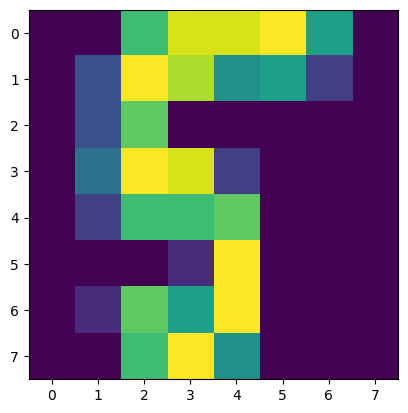

In [67]:
import matplotlib.pyplot as plt
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3)
xTrainMatrix = xTrain.reshape(-1, 8, 8)
plt.imshow(xTrainMatrix[0])

k= 1  Accuracy= 0.9851851851851852
k= 3  Accuracy= 0.9796296296296296
k= 5  Accuracy= 0.9740740740740741


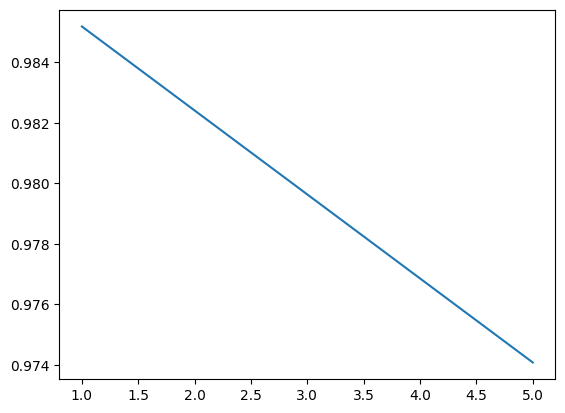

In [68]:
from sklearn.neighbors import KNeighborsClassifier as knc
import numpy as np
import pandas as pd

results = []

for k in range (1, 7, 2):
    classifier = knc(n_neighbors = k)
    classifier.fit(xTrain, yTrain)
    prediction = classifier.predict(xTest)
    accuracy = np.where(prediction == yTest, 1, 0).sum() / (len(yTest))
    print("k=", k, " Accuracy=", accuracy)
    results.append([k, accuracy])

results = pd.DataFrame(results, columns=["k", "accuracy"])

plt.plot(results.k, results.accuracy)
plt.show()

# Problem 2: Logistic Regression
### Part A: Logit Class

In [69]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

df = pd.read_csv('Social_Network_Ads.csv', index_col='User ID')

df

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0
...,...,...,...,...
15691863,Female,46,41000,1
15706071,Male,51,23000,1
15654296,Female,50,20000,1


In [71]:
df['Gender'].replace(['Male', 'Female'], [1, 0], inplace = True)
print(df.dtypes)
xlr = df.drop(columns=['Purchased'])
ylr = df['Purchased']
xTrainlr, xTestlr, yTrainlr, yTestlr = train_test_split(xlr, ylr, test_size = 0.3)
logmodel = sm.Logit(yTrainlr, sm.add_constant(xTrainlr)).fit(disp=False)
print(logmodel.summary())

Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  280
Model:                          Logit   Df Residuals:                      276
Method:                           MLE   Df Model:                            3
Date:                Sat, 28 Oct 2023   Pseudo R-squ.:                  0.4517
Time:                        16:26:33   Log-Likelihood:                -100.69
converged:                       True   LL-Null:                       -183.64
Covariance Type:            nonrobust   LLR p-value:                 9.765e-36
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -12.4730      1.586     -7.863      0.000     -15.582      -9.364
Ge

In [101]:
predictions = logmodel.predict(sm.add_constant(xTestlr))
binPredicitons = [1 if x >= 0.5 else 0 for x in predictions]
print(accuracy_score(yTestlr, binPredicitons))
print(confusion_matrix(yTestlr, binPredicitons))
print("\n")
predictions.iloc[:5]

0.875
[[71  8]
 [ 7 34]]




User ID
15593014    0.029651
15577806    0.631136
15789432    0.482910
15624510    0.000915
15622833    0.025795
dtype: float64

Text(0, 0.5, 'True Positive Rate')

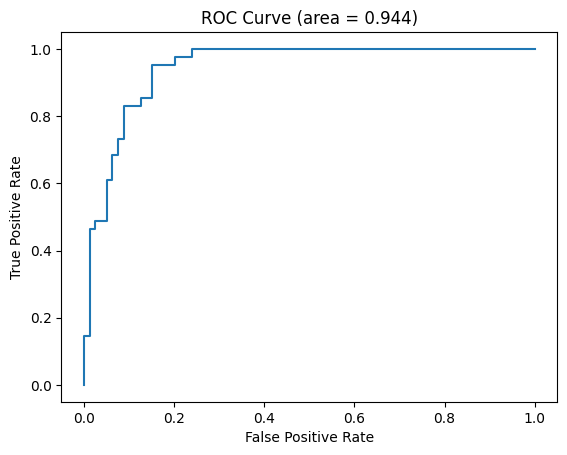

In [102]:
fpr, tpr, thresholds = roc_curve(yTestlr, predictions)
roc_auc = roc_auc_score(yTestlr, predictions)

plt.plot(fpr, tpr, label='ROC Curve (area = %0.3f)' % roc_auc)
plt.title('ROC Curve (area = %0.3f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Part B: logistic_regression_class

In [138]:
import logistic_regression_class as lrc
from sklearn.preprocessing import StandardScaler
lr = lrc.LogisticRegression()
scalar = StandardScaler()
xTrainfs = scalar.fit_transform(xTrainlr)
xTestfs = scalar.fit_transform(xTestlr)
yTrainfs = yTrainlr.values.reshape(-1, 1)
yTestfs = yTestlr.values.reshape(-1, 1)
lr.train(xTrainfs, yTrainfs, 40, 0.3)
print()

Cost after iteration 0: 0.6931471805599453



In [139]:
fsPredictions = lr.predict(xTestfs)
print(accuracy_score(yTestfs, fsPredictions))
print(confusion_matrix(yTestlr, fsPredictions))

0.875
[[71  8]
 [ 7 34]]


Text(0, 0.5, 'True Positive Rate')

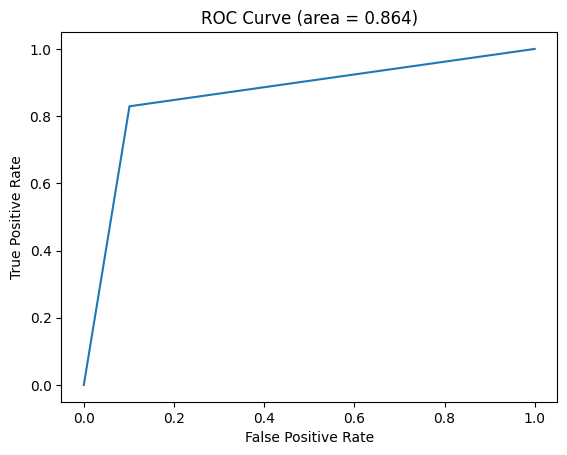

In [140]:
fpr, tpr, thresholds = roc_curve(yTestfs, fsPredictions)
roc_auc = roc_auc_score(yTestfs, fsPredictions)

plt.plot(fpr, tpr, label='ROC Curve (area = %0.3f)' % roc_auc)
plt.title('ROC Curve (area = %0.3f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Problem 3: Linear Discriminant Functions for Classification
### Part A: Dataset generation

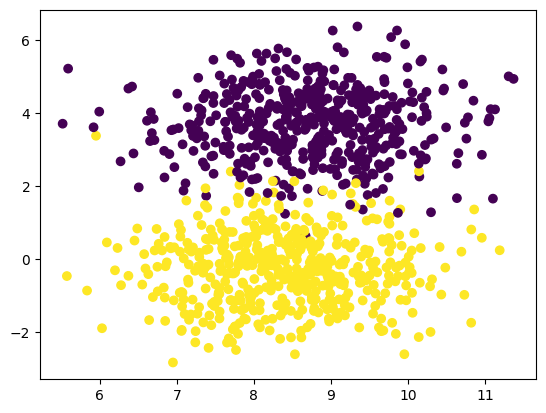

In [363]:
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=1000, centers = 2)
plt.scatter(x[:,0], x[:,1], c = y)

In [364]:
yTrue = y[:, np.newaxis]
xTrain, xTest, yTrain, yTest = train_test_split(x, yTrue)

In [367]:
xOne = np.ones((750, 1))
xTrainW = np.hstack((xOne, xTrain))
yTrainOpp = 1 - yTrain
t = np.hstack((yTrainOpp, yTrain))

xTrainT = xTrainW.T
xTx = np.dot(xTrainT, xTrainW)
xTt = np.dot(xTrainT, t)
xTxInverse = np.linalg.inv(xTx)
w = np.dot(xTxInverse, xTt)
print(w)


[[ 0.03269523  0.96730477]
 [ 0.01404492 -0.01404492]
 [ 0.20248249 -0.20248249]]


In [368]:
xOne = np.ones((250, 1))
xTestN = np.hstack((xOne, xTest))
predictions = 0

for i in range (250):
    yPredictionMatrix = np.dot(w.T, xTestN[i])
    if(yPredictionMatrix[0] > yPredictionMatrix[1]):
        yPrediction = 0
    else:
        yPrediction = 1

    if(yTest[i] == yPrediction):
        predictions += 1


print(predictions/250)

0.98


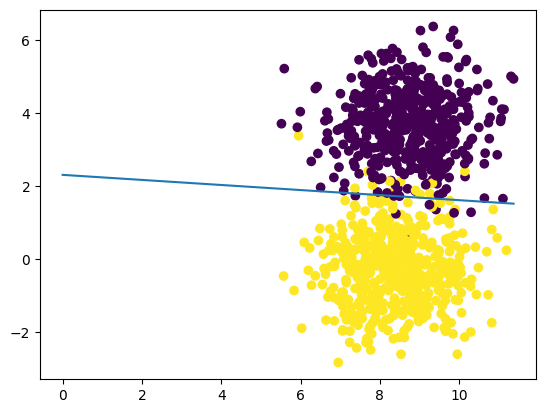

In [370]:
from sklearn.linear_model import LinearRegression

slope = -(w.T[0][1] - w.T[1][1])/(w.T[0][2] - w.T[1][2])
intercept = - (w.T[0][0] - w.T[1][0])/(w.T[0][2] - w.T[1][2])



model = LinearRegression()
xlin = np.linspace(0, xTrain.max(), 750)

yHyperplane = slope * xlin + intercept

plt.scatter(x[:,0], x[:,1], c = y)
plt.plot(xlin, yHyperplane)

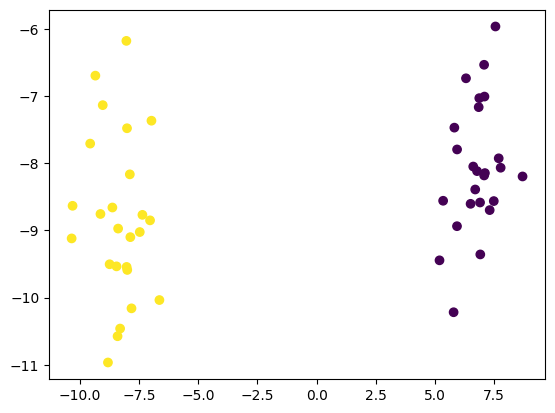

In [407]:
xNew, yNew = make_blobs(n_samples=50, centers = 2)
plt.scatter(xNew[:,0], xNew[:,1], c = yNew)

[[ 0.70360323  0.29639677]
 [-0.04468576  0.04468576]
 [ 0.12522589 -0.12522589]]
0.8935361216730038


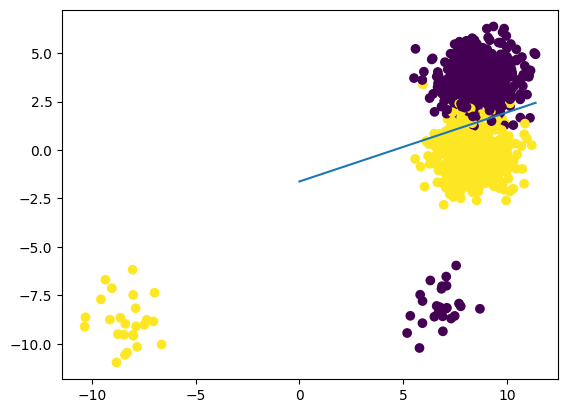

In [408]:
ynew = np.concatenate((y, yNew))
xnew = np.concatenate((x, xNew))
yTrue = ynew[:, np.newaxis]
xTrain, xTest, yTrain, yTest = train_test_split(xnew, yTrue)
xOne = np.ones((787, 1))
xTrainW = np.hstack((xOne, xTrain))
yTrainOpp = 1 - yTrain
t = np.hstack((yTrainOpp, yTrain))

xTrainT = xTrainW.T
xTx = np.dot(xTrainT, xTrainW)
xTt = np.dot(xTrainT, t)
xTxInverse = np.linalg.inv(xTx)
w = np.dot(xTxInverse, xTt)
print(w)
xOne = np.ones((263, 1))
xTestN = np.hstack((xOne, xTest))
predictions = 0

for i in range (250):
    yPredictionMatrix = np.dot(w.T, xTestN[i])
    if(yPredictionMatrix[0] > yPredictionMatrix[1]):
        yPrediction = 0
    else:
        yPrediction = 1

    if(yTest[i] == yPrediction):
        predictions += 1


print(predictions/263)
from sklearn.linear_model import LinearRegression

slope = -(w.T[0][1] - w.T[1][1])/(w.T[0][2] - w.T[1][2])
intercept = - (w.T[0][0] - w.T[1][0])/(w.T[0][2] - w.T[1][2])



model = LinearRegression()
xlin = np.linspace(0, xTrain.max(), 750)

yHyperplane = slope * xlin + intercept

plt.scatter(xnew[:,0], xnew[:,1], c = ynew)
plt.plot(xlin, yHyperplane)


- If you compare the two scatter plots and hyperplanes, you can see that the second hyperplane is off by a decent amount given the outliers. The acuracy dropped by over 10% as well. The hyperplane fails to be able to handle outliers given its linearity.

### Part B: Fisher's linear discriminant

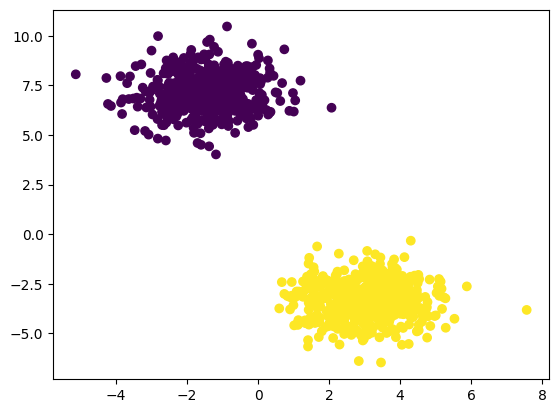

In [434]:
x, y = make_blobs(n_samples=1000, centers = 2)
plt.scatter(x[:,0], x[:,1], c = y)

In [444]:
yTrue = y[:, np.newaxis]
xTrain, xTest, yTrain, yTest = train_test_split(x, yTrue)

[-1.50432023  7.14152393]


In [453]:
m1 = np.mean(xTrain[yTrain.flatten()==0], axis = 0)
m2 = np.mean(xTrain[yTrain.flatten()==1], axis = 0)
print(m1)
print(m2)

[-1.50432023  7.14152393]
[ 3.00272937 -3.36053351]
0.7552139692360296


In [465]:
xN1 = np.where(yTrain == 0)
xN2 = np.where(yTrain == 1)

xm1 = [xTrain[n] - m1 for n in xN1]
xm2 = [xTrain[n] - m2 for n in xN2]

xmT1 = xm1.T
xmT2 = xm2.T

sw1 = np.dot(xm1, xmT1)
sw2 = np.dot(xm2, xmT2)

sw = sw1 + sw2


AttributeError: 'list' object has no attribute 'T'

In [ ]:
xTrainM1 = xTrain - m1
xTrainM1T = xTrainM1.T
x